### Martin Jungblut Schreiner e Matheus Prola Pfitscher

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [144]:
df = pd.read_csv("CC_DATASET.csv")

In [145]:
df = df.fillna(0)

In [146]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [123]:
sc = StandardScaler()
df_numeric = df.drop(["CUST_ID"], axis=1)
sc.fit(df_numeric)
df = pd.DataFrame(sc.transform(df_numeric), columns = df_numeric.columns)

In [124]:
k = 2
km_model = KMeans(n_clusters = k)
km_model.fit(X = df)
df["CLUSTER_K2"] = pd.DataFrame(km_model.labels_).values

In [125]:
k = 3
km_model = KMeans(n_clusters = k)
km_model.fit(X = df)
df["CLUSTER_K3"] = pd.DataFrame(km_model.labels_).values

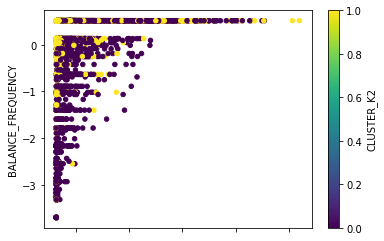

In [126]:
df.plot.scatter(x='BALANCE', y='BALANCE_FREQUENCY', c='CLUSTER_K2', colormap='viridis', s=20)
plt.show()

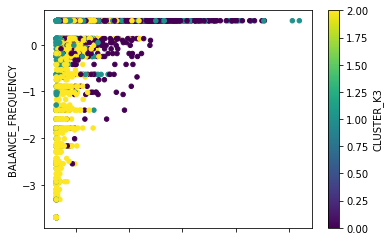

In [127]:
df.plot.scatter(x='BALANCE', y='BALANCE_FREQUENCY', c='CLUSTER_K3', colormap='viridis', s=20)
plt.show()

In [128]:
df = pd.read_csv("DIAG_CANCER.csv")

In [129]:
upper_quantile = df['radius_mean'].quantile(0.9)
filter_matrix = df['radius_mean'] < upper_quantile
target_mean = df[filter_matrix]['radius_mean'].median()
df.loc[np.invert(filter_matrix), 'radius_mean'] = target_mean

In [130]:
df = df.drop('Unnamed: 32', axis=1)

In [131]:
sc = StandardScaler()
df_numeric = df.drop(['id', 'diagnosis'], axis=1)
sc.fit(df_numeric)
df_train = pd.DataFrame(sc.transform(df_numeric), columns = df_numeric.columns)

In [132]:
pca = PCA(n_components = 5)
pca.fit(df_train)
X_pca = pca.transform(df_train)
pca.components_

array([[ 1.38952903e-01,  1.04784881e-01,  2.25713744e-01,
         2.17967801e-01,  1.48271773e-01,  2.46084063e-01,
         2.62853072e-01,  2.63269065e-01,  1.44087025e-01,
         7.24584063e-02,  2.05685136e-01,  1.89200748e-02,
         2.11481437e-01,  2.01100872e-01,  1.73775760e-02,
         1.77691571e-01,  1.59595935e-01,  1.88906870e-01,
         4.58658885e-02,  1.09438778e-01,  2.26493571e-01,
         1.06276279e-01,  2.35691828e-01,  2.22614519e-01,
         1.33974067e-01,  2.17378095e-01,  2.34906090e-01,
         2.54969289e-01,  1.28740667e-01,  1.40313126e-01],
       [-1.92506077e-01, -6.84294795e-02, -2.28293779e-01,
        -2.41124825e-01,  1.82170845e-01,  1.40608296e-01,
         4.94115432e-02, -4.67623703e-02,  1.86046094e-01,
         3.70053615e-01, -1.11476436e-01,  9.46082547e-02,
        -9.56361041e-02, -1.57570443e-01,  2.14048565e-01,
         2.27671886e-01,  1.93749544e-01,  1.23400594e-01,
         1.89518479e-01,  2.81013415e-01, -2.34284563e-

In [133]:
pca_df = pd.DataFrame(X_pca)
pca_df.head()

,0,1,2,3,4
0,9.376805,1.452055,-1.172066,3.683940,-0.986709
1,1.922151,-3.446571,-0.334178,1.143279,0.431444
2,5.428253,-0.953279,-0.387120,0.954716,-0.314803
3,7.511645,9.954564,-3.330777,0.164931,-2.930687
4,3.537011,-1.652757,1.546212,2.941927,0.469204


In [134]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df['diagnosis'], test_size=0.3, random_state=42)

In [135]:
model=LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score=accuracy_score(y_test, y_predict)

/home/insight/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [137]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, df['diagnosis'], test_size=0.3, random_state=42)

In [138]:
model=LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score=accuracy_score(y_test, y_predict)

/home/insight/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.99      0.99      0.99       108
           M       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

